In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

del os, sys

In [2]:
from tests.haner.gate_experiments.double_controlled_constant_modulo_adder import Experiment

In [3]:
constant = 11
n = 4
N = 13
experiment = Experiment(constant, N, n)

In [4]:
experiment._qregs_spec

{'ctrl': 2, 'x': 4, 'g': 3, 'flag': 1}

In [5]:
values = dict(ctrl=0b11, x=1, g=1)

In [6]:
qc = experiment._construct_circuit(values, 'qc')

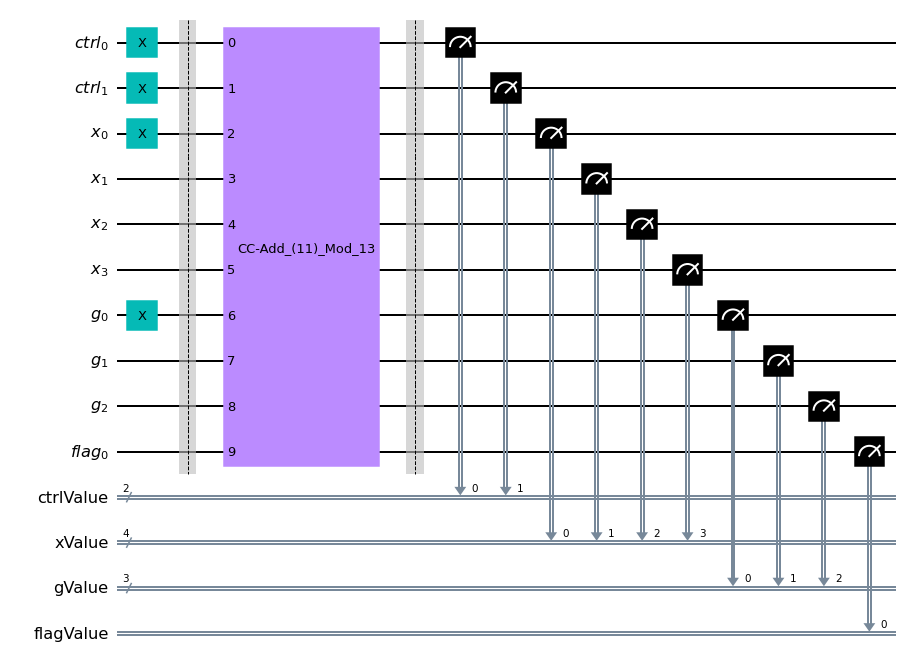

In [7]:
qc.draw(output='mpl')

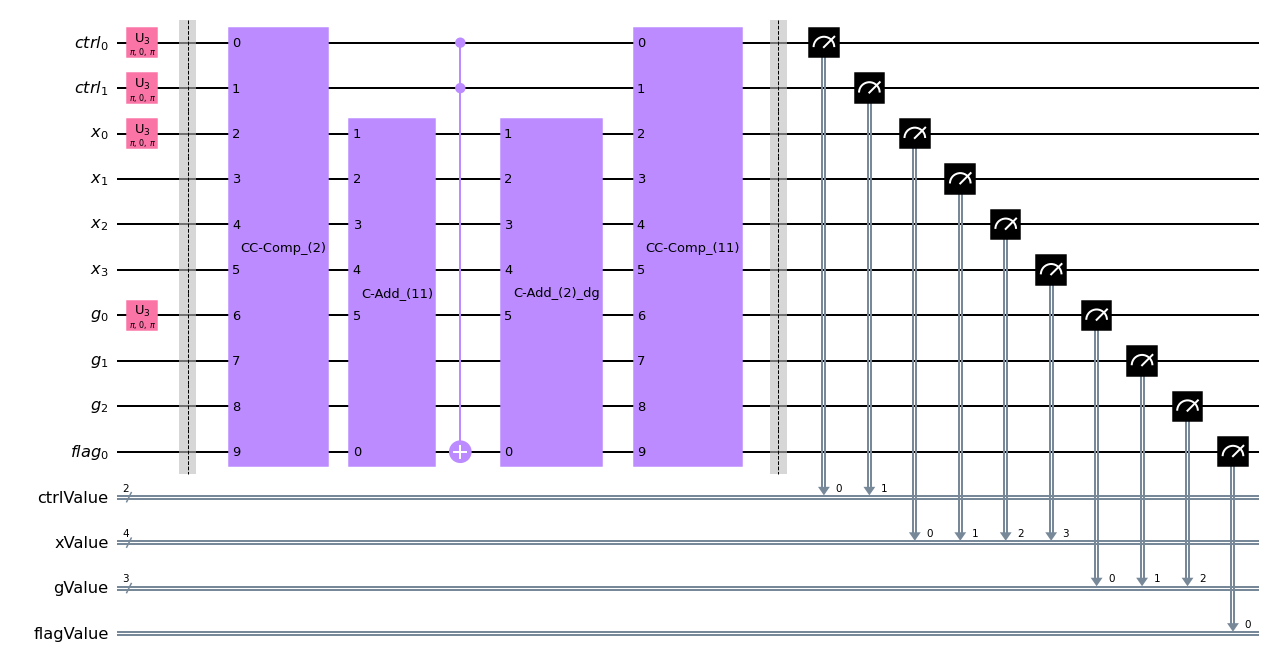

In [8]:
qc.decompose().draw(output='mpl')

In [9]:
res = experiment.run(values, 'demo')
res.get_counts('demo')

{'0 001 1100 11': 1}

In [10]:
constant = 0
n = 1
N = 1
experiment = Experiment(constant, N, n)

In [11]:
experiment._qregs_spec

{'ctrl': 2, 'x': 1, 'g': 1, 'flag': 1}

In [12]:
values = dict(ctrl=0b11, x=0, g=1)

In [13]:
qc = experiment._construct_circuit(values, 'qc')

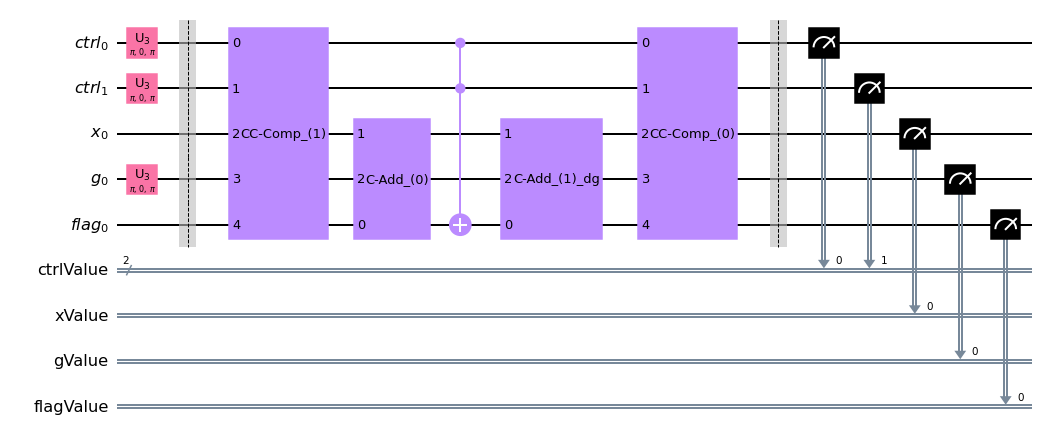

In [14]:
qc.decompose().draw(output='mpl')

In [15]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['x', 'cx', 'ccx'])
pm = PassManager(pass_)
dec_qc = pm.run(qc)

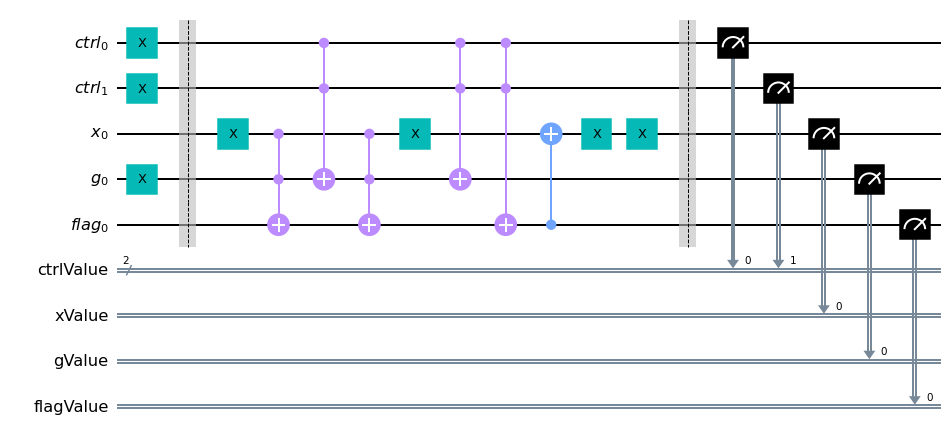

In [16]:
dec_qc.draw(output='mpl')

In [17]:
res = experiment.run(values, 'demo')
res.get_counts('demo')

{'0 1 0 11': 1}